In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Bu veri seti, konutlarla ilgili farklı özellikleri içeriyor. Her satır, bir konutun çeşitli özelliklerini ve fiyatını (price) temsil ediyor. Aşağıdaki sütunlar veri setinde mevcut:

+ price: Konutun satış fiyatı.
+ area: Konutun alanı (metrekare cinsinden).
+ bedrooms: Yatak odası sayısı.
+ bathrooms: Banyo sayısı.
+ stories: Kat sayısı.
+ mainroad: Ana yola yakın olup olmadığı ("yes" veya "no").
+ guestroom: Misafir odasının olup olmadığı.
+ basement: Bodrum katının olup olmadığı.
+ hotwaterheating: Sıcak su ısıtma sisteminin olup olmadığı.
+ airconditioning: Klima olup olmadığı.
+ parking: Park yeri sayısı.
+ prefarea: Tercih edilen bölgede olup olmadığı ("yes" veya "no").
+ furnishingstatus: Mobilya durumu ("furnished", "semi-furnished", "unfurnished").

### Bu veri setiyle ne tür analizler yapıldı?
Veri setinde yer alan konut özelliklerine dayanarak, K-means kümeleme algoritması ve lineer regresyon ile bir inceleme yapıldı. Bu süreçte özellikle alan ve yatak odası sayısı gibi iki özellik kullanılarak konutlar belirli kümelere ayrıldı.

K-means algoritması kullanılarak, evler benzer özelliklere göre 3 kümeye ayrıldı.
Kümeler, konutların alanı ve yatak odası sayısı gibi özelliklerine göre ayrıldı.
Bu kümeleme, aynı özelliklere sahip evlerin gruplandırılmasını sağladı, bu da potansiyel alıcılar için hangi evlerin benzer fiyat aralığında olabileceği ya da hangi evlerin daha çok tercih edilebileceği konusunda bir içgörü sundu.

In [2]:
#Gerekli kütüphaneleri import ederek başlıyorum.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#csv dosyasını okuyarak birkaç satırını inceliyorum
df = pd.read_csv("/kaggle/input/machine-learning-ornek/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Bütün satır ve sütunları getiriyorum.
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
#Toplam satır ve sütun sayısını inceliyorum.
df.shape

(545, 13)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price')

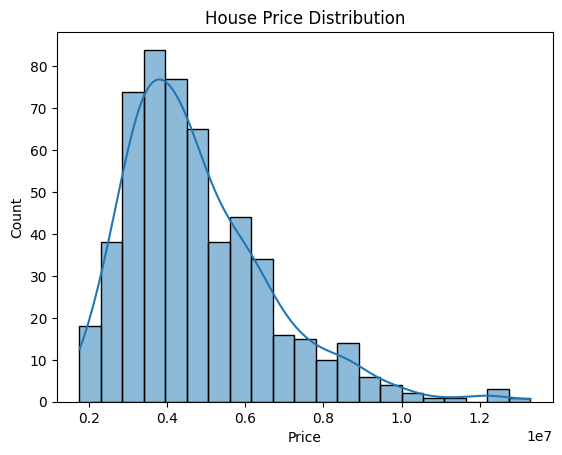

In [7]:
#Bu kodda, ev fiyatlarının (price) dağılımı bir histogram grafiği ile görselleştirilmiştir.
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')

Text(0, 0.5, 'Price')

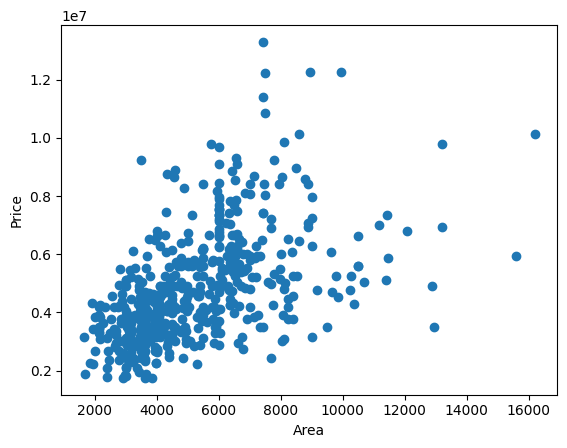

In [8]:
#Bu grafik, konut alanı ile fiyatı arasındaki ilişkiyi görselleştirmeye çalışır. Alan arttıkça fiyatın nasıl değiştiğini görmenizi sağlar.
plt.scatter(df["area"], df["price"])
plt.xlabel('Area')
plt.ylabel('Price')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


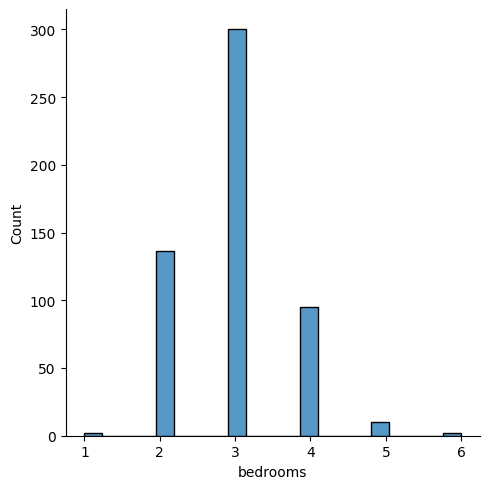

In [9]:
#Bu grafik, konutların yatak odası sayılarının nasıl dağıldığını gösterir. Yani hangi yatak odası sayısının daha yaygın olduğunu ve veri setindeki evlerin çoğunun kaç yatak odasına sahip olduğunu anlayabilirsiniz. Örneğin, çoğu evin 2 ya da 3 yatak odalı olduğunu görebilirsiniz.
sns.displot(df['bedrooms'])

<Axes: xlabel='furnishingstatus', ylabel='price'>

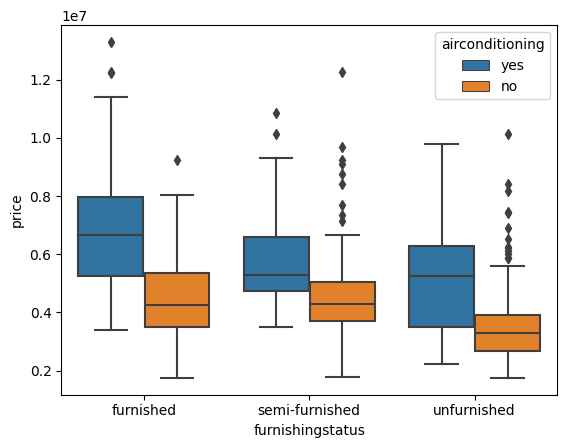

In [10]:
#Bu grafik, konutların mobilyalı olup olmadığına (furnishingstatus) ve klimanın (airconditioning) olup olmamasına göre fiyatların nasıl değiştiğini gösterir.
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
#Bu işlem, makine öğrenmesi modelleri için genellikle sayısal veriler kullanıldığı için kategorik verilerin sayısal verilere dönüştürülmesini sağlar.
one_hot_encoded_data = pd.get_dummies(df, columns = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
one_hot_encoded_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [13]:
#X: Modelin özellikleri olarak kullanılacak veri çerçevesidir ve "price" sütunu hariç tüm sütunları içerir.
#y: Modelin tahmin etmeye çalışacağı hedef değişkendir ve "price" sütununu içerir.
#Bu ayrım, makine öğrenmesi modelini eğitmek için gerekli olan veri hazırlık adımlarındandır.
X = one_hot_encoded_data.drop("price",axis=1)
y = one_hot_encoded_data["price"]

In [14]:
#Bu kod parçası, özellikler (X) ve hedef değişkeni (y) kullanarak veriyi eğitim ve test setlerine ayırır.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=7)

### Lineer Regresyon (Gözetimli Öğrenme Modeli)

In [16]:
#Bu kod parçası, scikit-learn kütüphanesinin LinearRegression sınıfını kullanarak bir doğrusal regresyon modeli oluşturur ve bu modeli eğitim verileri ile eğitir.
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)

In [17]:
#Bu kod parçası, daha önce eğitilmiş doğrusal regresyon modelini kullanarak test verileri (X_test) üzerinde tahminler yapar ve bu tahminleri y_pred değişkenine atar. 
y_pred=lr_model.predict(X_test)
y_pred

array([2597604.97950401, 6434641.11015087, 3346979.85479118,
       4525136.17856075, 3363604.97135958, 8262397.87540366,
       6840632.44442335, 4547755.28399239, 6335177.96227042,
       5245153.6006507 , 2884839.89684067, 5074429.75315421,
       6001086.77330394, 2591955.80887392, 5151713.71125852,
       1984652.38566392, 5870311.9148    , 6249872.99810422,
       4319812.55861777, 4390795.51830544, 3055243.39961044,
       3901214.92347361, 7456549.68764279, 4320056.28699096,
       3898353.73377147, 4552592.82698622, 5145264.84959069,
       2798223.71641751, 3895090.56215467, 5188661.89434985,
       4378452.10011742, 2473323.22564215, 4353273.17445534,
       3608171.78152783, 5714359.51737106, 6499253.99038341,
       3978447.00886528, 8067769.4067756 , 6317766.05285744,
       3081445.64368432, 4918676.18791346, 5824421.64191476,
       4963069.99667055, 3024971.51785939, 1936170.24337459,
       6603355.87783252, 5059450.29709121, 2716237.56273578,
       4062088.12327355,

In [20]:
from sklearn.metrics import mean_squared_error
# Gerçek hedef değerler (test setindeki gerçek değerler)
y_true = y_test

# Model tarafından tahmin edilen değerler
y_pred = lr_model.predict(X_test)

# Ortalama kare hatasını hesapla
mse = mean_squared_error(y_true, y_pred)

# MSE değerini yazdır
print("Ortalama Kare Hatası (MSE):", mse)

Ortalama Kare Hatası (MSE): 1086145050023.7712


Büyük bir sonuç elde ettik bu bizim için kötü bir sonuç. Bu MSE değeri oldukça yüksek. Bu, modelinizin tahminlerinin gerçek değerlerden büyük ölçüde sapma gösterdiği anlamına gelebilir.

In [22]:
# tahmin edilen değerler ve gerçek değerler arasındaki farkları görebilirsiniz. Tahminlerin gerçek değerlere ne kadar yakın olduğunu değerlendirerek modelinizin performansını daha iyi anlayabilirsiniz.
print(y_pred[0:10])
print(y_test[0:10])

[2597604.97950401 6434641.11015087 3346979.85479118 4525136.17856075
 3363604.97135958 8262397.87540366 6840632.44442335 4547755.28399239
 6335177.96227042 5245153.6006507 ]
542     1750000
70      6790000
504     2653000
221     4767000
519     2450000
3      12215000
50      7420000
281     4270000
217     4830000
132     5810000
Name: price, dtype: int64


In [23]:
#Bu kod, doğrusal regresyon modelinizin test setindeki performansını değerlendirir ve modelin ne kadar iyi olduğunu ölçen bir skor hesaplar.
lr_model.score(X_test,y_test)

0.6738153105039494

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

### Gözetimsiz öğrenme

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
#Fiyat sütunu hariç aynı veri setini kümelenme için kullanacağız.
X_cluster = df.drop(columns=['price'])

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Kategorik değişkenleri sayısal verilere dönüştürelim
label_enc = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    df[col] = label_enc.fit_transform(df[col])

In [28]:
# Eksik değerleri kontrol edelim
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [29]:
# Eksik değer varsa onları dolduralım (örneğin ortalama ile)
df.fillna(df.mean(), inplace=True)

In [30]:
# Fiyat sütunu dışındaki verileri al (X_cluster)
X_cluster = df.drop(columns=['price'])

In [32]:
# KMeans modelini eğit ve küme sonuçlarını al
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Sonuçları veri kümesine ekle
df['Cluster'] = clusters

# Küme sonuçlarını göster
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  Cluster  
0                 0        0  
1                 0        2  
2                 1        2  
3                 0        0  
4  

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Her kümenin ortalama özelliklerini görüntüle
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

                price          area  bedrooms  bathrooms   stories  mainroad  \
Cluster                                                                        
0        5.798342e+06   6503.922680  3.103093   1.396907  2.010309  0.963918   
1        3.906492e+06   3669.162939  2.856230   1.188498  1.674121  0.776358   
2        6.585711e+06  10443.052632  3.157895   1.526316  1.842105  1.000000   

         guestroom  basement  hotwaterheating  airconditioning   parking  \
Cluster                                                                    
0         0.319588  0.407216         0.041237         0.489691  0.907216   
1         0.099042  0.319489         0.051118         0.198083  0.472843   
2         0.105263  0.315789         0.026316         0.394737  1.421053   

         prefarea  furnishingstatus  
Cluster                              
0        0.381443          0.989691  
1        0.121406          1.169329  
2        0.421053          0.657895  


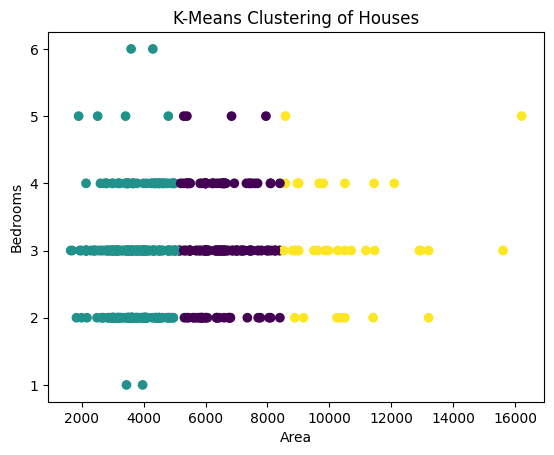

In [34]:
# İki değişkeni (örneğin area ve bedrooms) kullanarak kümeleri görselleştirin
plt.scatter(df['area'], df['bedrooms'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Bedrooms')
plt.title('K-Means Clustering of Houses')
plt.show()

Bu görselleştirme, evlerin alanı ve yatak odası sayısı gibi özelliklerine göre nasıl kümelendiğini görselleştirir. Aynı kümeye ait olan evler, özellikler açısından birbirine benzer, farklı kümelerdeki evler ise özellik açısından daha farklıdır.

Bu analiz, hangi özelliklerin ev fiyatlarını veya tercihleri etkilediğini anlamak için daha derin bir içgörü sağlar.